In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data

In [2]:
# Reading gene and variation data
gv_data = pd.read_csv("training_variants")
gv_data.head()

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [3]:
print("Shape of gene variant data:", gv_data.shape)
print("Number of features in gene variant data:", gv_data.shape[1])

Shape of gene variant data: (3321, 4)
Number of features in gene variant data: 4


In [4]:
# Reading Text data
txt_data = pd.read_csv("training_text", sep="\|\|", names=["ID","Text"], skiprows=1)
txt_data.head()

C:\Users\venkatesh lotlikar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,ID,Text
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [5]:
print("Shape of text data:", txt_data.shape)
print("Number of features in text data:", txt_data.shape[1])

Shape of text data: (3321, 2)
Number of features in text data: 2


# Merge data

In [6]:
df = pd.merge(gv_data, txt_data, on ="ID", how = "left")
df.head()

,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...


In [7]:
print("Shape of dataset:", df.shape)

Shape of dataset: (3321, 5)


# Data distribution

1    568
2    452
3     89
4    686
5    242
6    275
7    953
8     19
9     37
Name: Class, dtype: int64
************************Histogram of Class*******************************


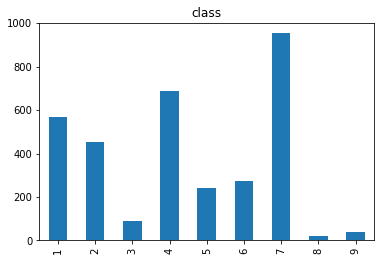

In [8]:
print(df["Class"].value_counts().sort_index())
print("************************Histogram of Class*******************************")
cls = df["Class"].value_counts().sort_index()
cls.plot(kind="bar", title="class")
plt.show()

In [9]:
print("************************Gene*******************************")
print(df["Gene"].value_counts())

************************Gene*******************************
BRCA1    264
TP53     163
EGFR     141
PTEN     126
BRCA2    125
        ... 
KLF4       1
WHSC1      1
RRAS2      1
HLA-B      1
JUN        1
Name: Gene, Length: 264, dtype: int64


In [10]:
print("************************Variation*******************************")
print(df["Variation"].value_counts())

************************Variation*******************************
Truncating Mutations    93
Deletion                74
Amplification           71
Fusions                 34
Overexpression           6
                        ..
T1203K                   1
R283Q                    1
A677G                    1
S34F                     1
R2505Q                   1
Name: Variation, Length: 2996, dtype: int64


# Preprocess text data

In [11]:
# Preprocesing of text data from df
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\venkatesh
[nltk_data]     lotlikar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print("not" in stop_words)

True


In [13]:
import re
def preprocess(text,row,col):
    if type(text) is not int:
        text_p = ""
        # eliminate special characters
        text = re.sub("[^A-Za-z0-9\n]"," ", text)
        # replace multiple white spaces with single white space
        text = re.sub("\s+", " ", text)
        # upper to lower
        text = text.lower()

        for word in text.split():
            # if the word is a not a stop word then retain that word from the data
                if not word in stop_words: #and word == "not":
                    text_p += word + " "

        df[col][row] = text_p  
    
for row, columns in df.iterrows():
    if type(columns["Text"]) == str:
        preprocess(columns["Text"], row, "Text")
    else:
        print("No text present in row {}".format(row))

C:\Users\venkatesh lotlikar\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


No text present in row 1109
No text present in row 1277
No text present in row 1407
No text present in row 1639
No text present in row 2755


In [14]:
df.head()

,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


# Finding and handling null values

In [15]:
df[df.isnull().any(axis=1)]  # missing data

,ID,Gene,Variation,Class,Text
1109,1109,FANCA,S1088F,1,NaN
1277,1277,ARID5B,Truncating Mutations,1,NaN
1407,1407,FGFR3,K508M,6,NaN
1639,1639,FLT1,Amplification,6,NaN
2755,2755,BRAF,G596C,7,NaN


In [16]:
for row, column in df[df.isnull().any(axis=1)].iterrows():         # fill the missing data
    df["Text"][row] = df["Gene"][row] + " " + df["Variation"][row]

C:\Users\venkatesh lotlikar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
df[df["ID"] == 1277]

,ID,Gene,Variation,Class,Text
1277,1277,ARID5B,Truncating Mutations,1,ARID5B Truncating Mutations


In [18]:
df[df.isnull().any(axis=1)]

,ID,Gene,Variation,Class,Text


# Splitting data into train , cross validation and test

In [19]:
X = df
y = df["Class"]

In [20]:
from sklearn.model_selection import train_test_split
X_tr, X_test, y_tr, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
X_train, X_cv, y_train, y_cv = train_test_split(X_tr, y_tr, stratify=y_tr, test_size=0.2)

In [21]:
print("Shape of train data:", X_train.shape)
print("Shape of cross validation data:", X_cv.shape)
print("Shape of test data:", X_test.shape)

Shape of train data: (2124, 5)
Shape of cross validation data: (532, 5)
Shape of test data: (665, 5)


1    363
2    289
3     57
4    439
5    155
6    176
7    609
8     12
9     24
Name: Class, dtype: int64
************************Histogram of X_train*******************************


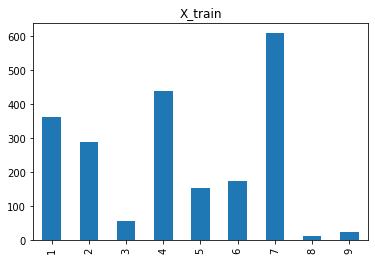

In [22]:
print(X_train["Class"].value_counts().sort_index())
print("************************Histogram of X_train*******************************")
cls = X_train["Class"].value_counts().sort_index()
cls.plot(kind="bar", title="X_train")
plt.show()

1     91
2     72
3     14
4    110
5     39
6     44
7    153
8      3
9      6
Name: Class, dtype: int64
************************Histogram of X_cv*******************************


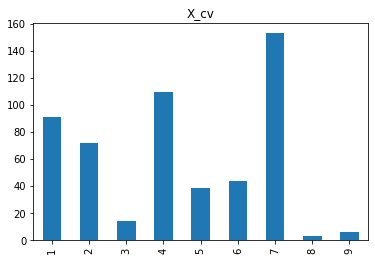

In [23]:
print(X_cv["Class"].value_counts().sort_index())
print("************************Histogram of X_cv*******************************")
cls = X_cv["Class"].value_counts().sort_index()
cls.plot(kind="bar", title="X_cv")
plt.show()

1    363
2    289
3     57
4    439
5    155
6    176
7    609
8     12
9     24
Name: Class, dtype: int64
************************Histogram of X_test*******************************


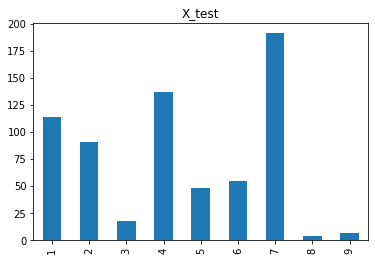

In [24]:
print(X_train["Class"].value_counts().sort_index())
print("************************Histogram of X_test*******************************")
cls = X_test["Class"].value_counts().sort_index()
cls.plot(kind="bar", title="X_test")
plt.show()

# Featurizing the data

#### [1] TFIDF feature vectorizer

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [145]:
#Gene
tfidf_gene_vect = TfidfVectorizer(ngram_range=(1,3),stop_words = 'english')

tfidf_gene_train = tfidf_gene_vect.fit_transform(X_train["Gene"])
tfidf_gene_cv = tfidf_gene_vect.transform(X_cv["Gene"])
tfidf_gene_test = tfidf_gene_vect.transform(X_test["Gene"])

In [146]:
print("Train:",tfidf_gene_train.toarray().shape)
print("Cv:",tfidf_gene_cv.toarray().shape)
print("Test:",tfidf_gene_test.toarray().shape)

Train: (2124, 232)
Cv: (532, 232)
Test: (665, 232)


In [149]:
#Variation
tfidf_variation_vect = TfidfVectorizer(ngram_range=(1,3), stop_words = 'english')

tfidf_variation_train = tfidf_gene_vect.fit_transform(X_train["Variation"])
tfidf_variation_cv = tfidf_gene_vect.transform(X_cv["Variation"])
tfidf_variation_test = tfidf_gene_vect.transform(X_test["Variation"])

In [150]:
print("Train:",tfidf_variation_train.toarray().shape)
print("Cv:",tfidf_variation_cv.toarray().shape)
print("Test:",tfidf_variation_test.toarray().shape)

Train: (2124, 2255)
Cv: (532, 2255)
Test: (665, 2255)


#### [2] Response coding

In [88]:
X_train["Gene"].value_counts()

BRCA1      169
TP53       110
EGFR        97
PTEN        75
BRCA2       71
          ... 
DUSP4        1
WHSC1L1      1
CDKN1A       1
SRC          1
AURKB        1
Name: Gene, Length: 232, dtype: int64

In [89]:
for i, j in X_train["Gene"].value_counts().items():
    print(i,j)
    break

BRCA1 169


In [91]:
X_train.loc[(X_train['Class']==3) & (X_train["Gene"]=="BRCA1")].shape

(10, 5)

In [82]:
X_train.loc[X_train["Gene"]=="BRCA1"].shape

(169, 5)

In [122]:
# code to get response coded featurization
def train_resp_code(column):
    column_count = X_train[column].value_counts().items()
    code = {}
    for col, tot_count in column_count:
        response = []
        for cls in range(1,10):
            val = X_train.loc[(df['Class']==cls) & (X_train[column]==col)].shape[0]
            cls_response = (val+10)/(tot_count+90)       # use laplace smoothing
            response.append(cls_response)
        code[col] = response
        
    return code

def resp_code_for_df(df, col_name):
    col_code = []
    code_dic = train_resp_code(col_name)
    col_dic = dict(X_train[col_name].value_counts())
    for idx, data_pt in df.iterrows():
        if data_pt[col_name] in col_dic.keys():
            col_code.append(code_dic[data_pt[col_name]])
        else:
            col_code.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
            
    return col_code

In [123]:
#response code for Gene
resp_code_gene_train = np.array(resp_code_for_df(X_train, "Gene"))
resp_code_gene_cv = np.array(resp_code_for_df(X_cv, "Gene"))
resp_code_gene_test = np.array(resp_code_for_df(X_test, "Gene"))

In [152]:
print("Train:", resp_code_gene_train.shape)
print("Cv:", resp_code_gene_cv.shape)
print("Test:", resp_code_gene_test.shape)

Train: (2124, 9)
Cv: (532, 9)
Test: (665, 9)


In [138]:
#response code for Gene
resp_code_variation_train = np.array(resp_code_for_df(X_train, "Variation"))
resp_code_variation_cv = np.array(resp_code_for_df(X_cv, "Variation"))
resp_code_variation_test = np.array(resp_code_for_df(X_test, "Variation"))

In [153]:
print("Train:", resp_code_variation_train.shape)
print("Cv:", resp_code_variation_cv.shape)
print("Test:", resp_code_variation_test.shape)

Train: (2124, 9)
Cv: (532, 9)
Test: (665, 9)


#### Response code for text

In [198]:
def all_dict(df):
    item_dict = {}
    for idx, column in df.iterrows():
        for item in column["Text"].split():
            if item in item_dict.keys():
                item_dict[item] += 1
            else:
                item_dict[item] = 1
    return item_dict


corpus_dict = all_dict(X_train)
cls_dict_list = []
for cls in range(1,10):
    cls_df = X_train[X_train['Class']==i]
    cls_dict_list.append(all_dict(cls_df))
    
    
import math
def text_resp_code(df):
    size = df.shape[0]
    resp_code = np.zeros((size,9))
    for i in range(0,9):
        idx = 0
        for j, text in df.iterrows():
            prob = 0
            for item in text['Text'].split():
                prob += math.log(((cls_dict_list[i].get(item,0)+10 )/(corpus_dict.get(item,0)+90)))
            resp_code[idx][i] = math.exp(prob/len(text['Text'].split()))
            idx += 1
    return resp_code    

In [199]:
resp_code_text_train = text_resp_code(X_train)
resp_code_text_cv = text_resp_code(X_cv)
resp_code_text_test = text_resp_code(X_test)

In [229]:
resp_code_text_train = (resp_code_text_train.T/resp_code_text_train.sum(axis=1)).T
resp_code_text_cv = (resp_code_text_cv.T/resp_code_text_cv.sum(axis=1)).T
resp_code_text_test = (resp_code_text_test.T/resp_code_text_test.sum(axis=1)).T

In [230]:
print("Train:", resp_code_text_train.shape)
print("Cv:", resp_code_text_cv.shape)
print("Test:", resp_code_text_test.shape)

Train: (2124, 9)
Cv: (532, 9)
Test: (665, 9)


In [232]:
sum(resp_code_text_test[0])

1.0000000000000002

#### Tfidf Vector for text

In [234]:
from sklearn.preprocessing import normalize
tfidf_text_vect = TfidfVectorizer(max_features = 1000, ngram_range=(1,3), stop_words = 'english')

tfidf_text_train = tfidf_text_vect.fit_transform(X_train["Text"])
tfidf_text_train = normalize(tfidf_text_train, axis = 0)

tfidf_text_cv = tfidf_text_vect.fit_transform(X_cv["Text"])
tfidf_text_cv = normalize(tfidf_text_cv, axis = 0)

tfidf_text_test = tfidf_text_vect.fit_transform(X_test["Text"])
tfidf_text_test = normalize(tfidf_text_test, axis = 0)

In [235]:
print("Train:",tfidf_text_train.toarray().shape)
print("Cv:",tfidf_text_cv.toarray().shape)
print("Test:",tfidf_text_test.toarray().shape)

Train: (2124, 1000)
Cv: (532, 1000)
Test: (665, 1000)


### Merging the tfidf vectors and response codes

In [285]:
from scipy.sparse import hstack

tfidf_train = hstack((tfidf_gene_train, tfidf_variation_train))
tfidf_gvt_train = hstack((tfidf_train, tfidf_text_train))

tfidf_cv = hstack((tfidf_gene_cv, tfidf_variation_cv))
tfidf_gvt_cv = hstack((tfidf_cv, tfidf_text_cv))

tfidf_test = hstack((tfidf_gene_test, tfidf_variation_test))
tfidf_gvt_test = hstack((tfidf_test, tfidf_text_test))

In [305]:
print("Train_X:",tfidf_gvt_train.shape)
print("Cv_X:",tfidf_gvt_cv.shape)
print("Test_X:",tfidf_gvt_test.shape)

Train_X: (2124, 3487)
Cv_X: (532, 3487)
Test_X: (665, 3487)


In [290]:
resp_code_train = np.hstack((resp_code_gene_train, resp_code_variation_train))
resp_code_gvt_train = np.hstack((resp_code_train, resp_code_text_train))

resp_code_cv = np.hstack((resp_code_gene_cv, resp_code_variation_cv))
resp_code_gvt_cv = np.hstack((resp_code_cv, resp_code_text_cv))

resp_code_test = np.hstack((resp_code_gene_test, resp_code_variation_test))
resp_code_gvt_test = np.hstack((resp_code_test, resp_code_text_test))

In [306]:
print("Train_X:",resp_code_gvt_train.shape)
print("Cv_X:",resp_code_gvt_cv.shape)
print("Test_x:",resp_code_gvt_test.shape)

Train_X: (2124, 27)
Cv_X: (532, 27)
Test_x: (665, 27)


In [304]:
train_class = np.array(y_train)
cv_class = np.array(y_cv)
test_class = np.array(y_test)

In [307]:
print("Train_y:",train_class.shape[0])
print("Cv_y:",cv_class.shape[0])
print("Test_y:",test_class.shape[0])

Train_y: 2124
Cv_y: 532
Test_y: 665


# Modelling

In [465]:
def conf_mat(actual, pred):
    confusion_mat = confusion_matrix(actual,pred)
    labels = [1,2,3,4,5,6,7,8,9]
    plt.figure(figsize=(15,10))
    sns.heatmap(confusion_mat, annot=True, xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Original')
    plt.show()    

In [472]:
def plot(x_ax, y_ax):
    plt.plot(x,y)
    plt.xlabel("Alphas")
    plt.ylabel("Log-loss")
    plt.title("CV Loss")
    plt.show()

## Random/Dummy Model

In [459]:
import random
def random_model(X_data, y_true):
    np.random.seed(10)
    pred = np.zeros((X_data.shape[0],9))
    for i in range(pred.shape[0]):
        rand = np.random.rand(1,9)
        prob = rand/np.sum(rand)
        pred[i] = prob
        
    loss = log_loss(y_true, pred, eps=1e-15)
    return [pred,loss]

print("Random model CV log-loss", random_model(X_cv, y_cv)[1])
print("Random model test log-loss", random_model(X_test, y_test)[1])

Random model CV log-loss 2.497649484497925
Random model test log-loss 2.5140217290146536


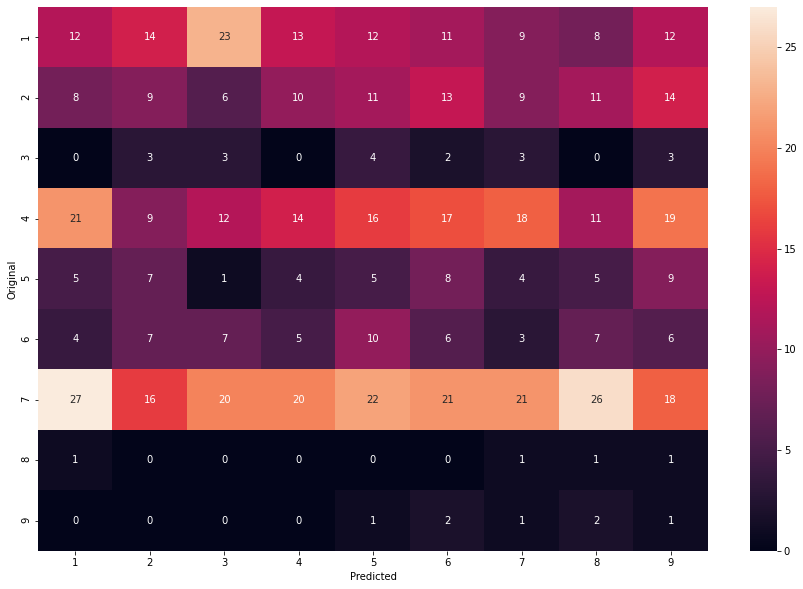

In [460]:
conf_mat = confusion_matrix(y_test,np.argmax(random_model(X_test, y_test)[0], axis=1)+1)
labels = [1,2,3,4,5,6,7,8,9]
plt.figure(figsize=(15,10))
sns.heatmap(conf_mat, annot=True, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Original')
plt.show()    

## 1. Naive Bayes 

In [461]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.calibration import CalibratedClassifierCV

### 1.1. With Tfidf vectors

In [462]:
alphas = [0.0001, 0.001, 0.1, 1, 10, 100]
loss_dict = {}
error_arr = []
for alpha in alphas:
    model = MultinomialNB(alpha=alpha)
    model.fit(tfidf_gvt_train, train_class)
    calibrated_model = CalibratedClassifierCV(model, method="sigmoid")
    calibrated_model.fit(tfidf_gvt_train, train_class)
    calibrated_probabilites = calibrated_model.predict_proba(tfidf_gvt_cv)
    loss = log_loss(cv_class, calibrated_probabilites, eps=1e-15)
    loss_dict[alpha] = loss
    error_arr.append(loss)
    best_alpha_tfidf = alphas[np.argmin(error_arr)]
    
    
print("Alphas and losses: ",loss_dict)
print("***********************************************************************************************************************")
print("Best alpha:",best_alpha_tfidf, ", and corrosponding loss:", loss_dict[best_alpha_tfidf])

Alphas and losses:  {0.0001: 1.3691164103994804, 0.001: 1.3567937905218157, 0.1: 1.3416043039486378, 1: 1.430500496522526, 10: 1.5448502111248186, 100: 1.4784781745516633}
***********************************************************************************************************************
Best alpha: 0.1 , and corrosponding loss: 1.3416043039486378


In [463]:
best_model = MultinomialNB(alpha=best_alpha_tfidf)
best_model.fit(tfidf_gvt_train, train_class)
calibrated_best_model = CalibratedClassifierCV(best_model, method="sigmoid")
calibrated_best_model.fit(tfidf_gvt_train, train_class)

predicted_train = calibrated_best_model.predict_proba(tfidf_gvt_train)
train_loss = log_loss(train_class, predicted_train, eps=1e-15)
print("The train log loss is:",train_loss)

predicted_cv = calibrated_best_model.predict_proba(tfidf_gvt_cv)
cv_loss = log_loss(cv_class, predicted_cv, eps=1e-15)
print("The cv log loss is:",cv_loss)

predicted_test = calibrated_best_model.predict_proba(tfidf_gvt_test)
test_loss = log_loss(test_class, predicted_test, eps=1e-15)
print("The test log loss is:",test_loss)

The train log loss is: 0.5586611838230131
The cv log loss is: 1.3416043039486378
The test log loss is: 1.2329983818688202


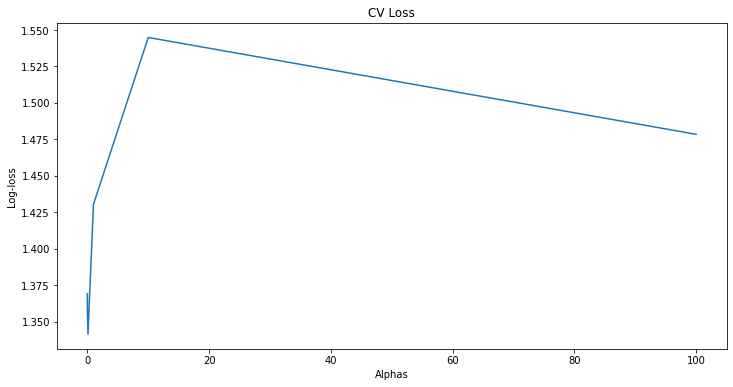

In [473]:
x = list(loss_dict.keys())
y = list(loss_dict.values())
plot(x,y)

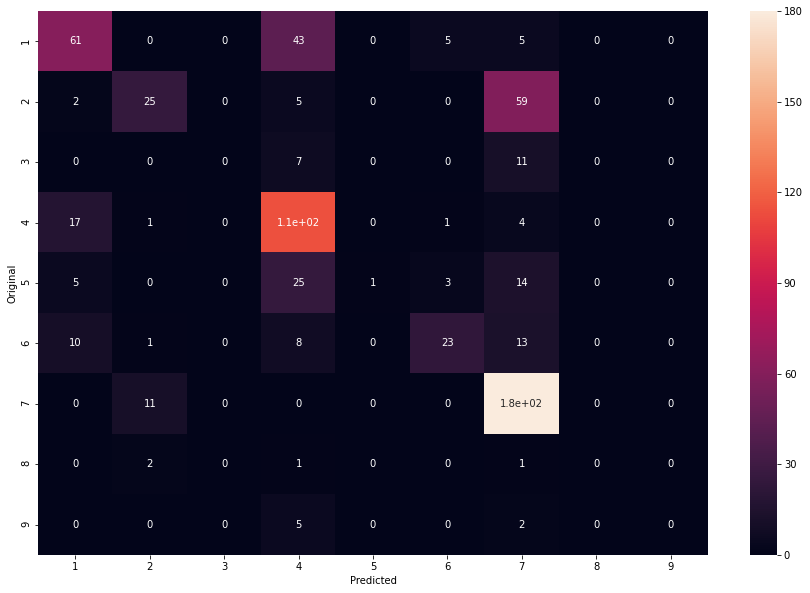

In [474]:
pred = []
for i in predicted_test:
    pred.append(np.argmax(i)+1)
conf_mat(test_class, pred)

### 1.2. With Response codes

In [475]:
alphas = [0.0001, 0.001, 0.1, 1, 10, 100]
loss_dict = {}
error_arr = []
for alpha in alphas:
    model = MultinomialNB(alpha=alpha)
    model.fit(resp_code_gvt_train, train_class)
    calibrated_model = CalibratedClassifierCV(model, method="sigmoid")
    calibrated_model.fit(resp_code_gvt_train, train_class)
    calibrated_probabilites = calibrated_model.predict_proba(resp_code_gvt_cv)
    loss = log_loss(cv_class, calibrated_probabilites, eps=1e-15)
    loss_dict[alpha] = loss
    error_arr.append(loss)
    best_alpha_rc = alphas[np.argmin(error_arr)]
    
    
print("Alphas and losses: ",loss_dict)
print("***********************************************************************************************************************")
print("Best alpha:",best_alpha_rc, ", and corrosponding loss:", loss_dict[best_alpha_rc])

Alphas and losses:  {0.0001: 1.29578346294689, 0.001: 1.2957828725409404, 0.1: 1.2957465747903796, 1: 1.2953555041762654, 10: 1.309400601041354, 100: 1.325908501715475}
***********************************************************************************************************************
Best alpha: 1 , and corrosponding loss: 1.2953555041762654


In [476]:
best_model = MultinomialNB(alpha=best_alpha_rc)
best_model.fit(resp_code_gvt_train, train_class)
calibrated_best_model = CalibratedClassifierCV(best_model, method="sigmoid")
calibrated_best_model.fit(resp_code_gvt_train, train_class)

predicted_train = calibrated_best_model.predict_proba(resp_code_gvt_train)
train_loss = log_loss(train_class, predicted_train, eps=1e-15)
print("The train log loss is:",train_loss)

predicted_cv = calibrated_best_model.predict_proba(resp_code_gvt_cv)
cv_loss = log_loss(cv_class, predicted_cv, eps=1e-15)
print("The cv log loss is:",cv_loss)

predicted_test = calibrated_best_model.predict_proba(resp_code_gvt_test)
test_loss = log_loss(test_class, predicted_test, eps=1e-15)
print("The test log loss is:",test_loss)

The train log loss is: 1.2633662883784376
The cv log loss is: 1.2953555041762654
The test log loss is: 1.3034372677042023


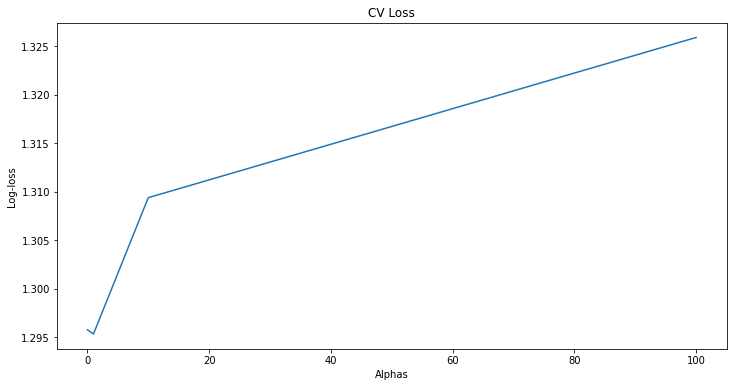

In [478]:
x = list(loss_dict.keys())
y = list(loss_dict.values())
plot(x,y)

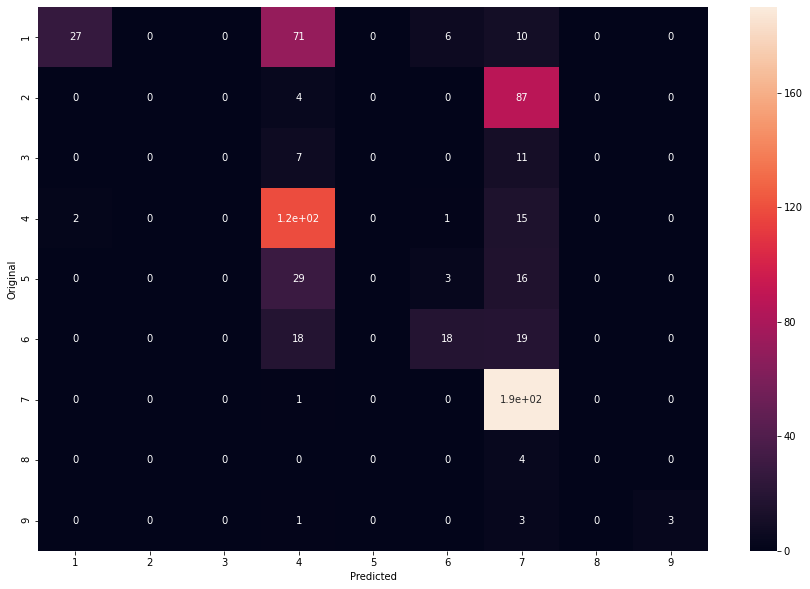

In [479]:
pred = []
for i in predicted_test:
    pred.append(np.argmax(i)+1)
conf_mat(test_class, pred)

## 2. Logistic regression

In [414]:
from sklearn.linear_model import SGDClassifier

### 2.1. With Tfidf vectors

In [480]:
alphas = [10 ** x for x in range(-5, 2)]
loss_dict = {}
error_arr = []
for alpha in alphas:
    model = SGDClassifier(class_weight='balanced', alpha=alpha, penalty='l2', loss='log', random_state=42)
    model.fit(tfidf_gvt_train, train_class)
    calibrated_model = CalibratedClassifierCV(model, method="sigmoid")
    calibrated_model.fit(tfidf_gvt_train, train_class)
    calibrated_probabilites = calibrated_model.predict_proba(tfidf_gvt_cv)
    loss = log_loss(cv_class, calibrated_probabilites, eps=1e-15)
    loss_dict[alpha] = loss
    error_arr.append(loss)
    best_alpha_tfidf = alphas[np.argmin(error_arr)]
    
    
print("Alphas and losses: ",loss_dict)
print("***********************************************************************************************************************")
print("Best alpha:",best_alpha_tfidf, ", and corrosponding loss:", loss_dict[best_alpha_tfidf])

Alphas and losses:  {1e-05: 1.3415371915820495, 0.0001: 1.1935476563376006, 0.001: 1.1571566356317695, 0.01: 1.3012958129993415, 0.1: 1.6484643530727643, 1: 1.767103637311228, 10: 1.7810585933681096}
***********************************************************************************************************************
Best alpha: 0.001 , and corrosponding loss: 1.1571566356317695


In [481]:
best_model = SGDClassifier(class_weight='balanced', alpha=best_alpha_tfidf, penalty='l2', loss='log', random_state=42)
best_model.fit(tfidf_gvt_train, train_class)
calibrated_best_model = CalibratedClassifierCV(best_model, method="sigmoid")
calibrated_best_model.fit(tfidf_gvt_train, train_class)

predicted_train = calibrated_best_model.predict_proba(tfidf_gvt_train)
train_loss = log_loss(train_class, predicted_train, eps=1e-15)
print("The train log loss is:",train_loss)

predicted_cv = calibrated_best_model.predict_proba(tfidf_gvt_cv)
cv_loss = log_loss(cv_class, predicted_cv, eps=1e-15)
print("The cv log loss is:",cv_loss)

predicted_test = calibrated_best_model.predict_proba(tfidf_gvt_test)
test_loss = log_loss(test_class, predicted_test, eps=1e-15)
print("The test log loss is:",test_loss)

The train log loss is: 0.7188574924785088
The cv log loss is: 1.1571566356317695
The test log loss is: 1.097216529114107


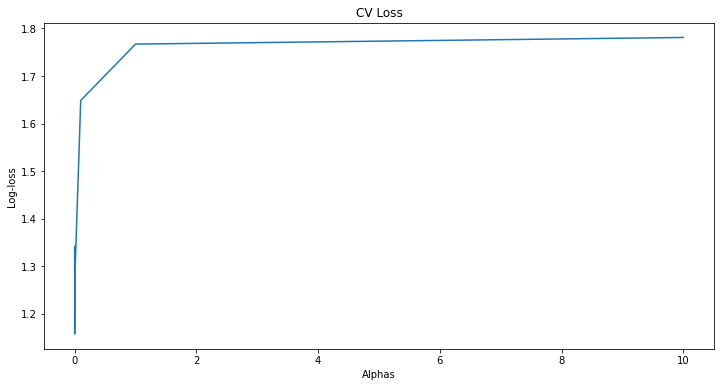

In [482]:
x = list(loss_dict.keys())
y = list(loss_dict.values())
plot(x,y)

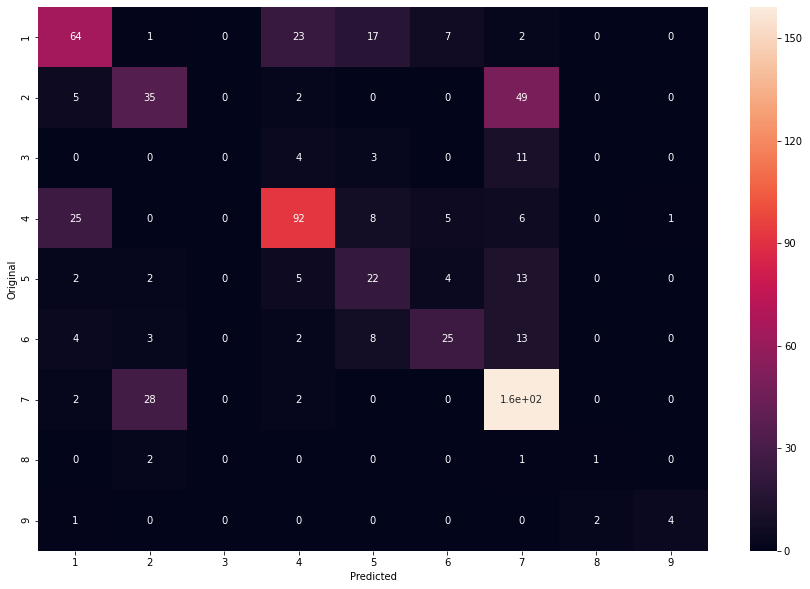

In [483]:
pred = []
for i in predicted_test:
    pred.append(np.argmax(i)+1)
conf_mat(test_class, pred)

### 2.2. With Response codes

In [484]:
alphas = [10 ** x for x in range(-5, 2)]
loss_dict = {}
error_arr = []
for alpha in alphas:
    model = SGDClassifier(class_weight='balanced', alpha=alpha, penalty='l2', loss='log', random_state=42)
    model.fit(resp_code_gvt_train, train_class)
    calibrated_model = CalibratedClassifierCV(model, method="sigmoid")
    calibrated_model.fit(resp_code_gvt_train, train_class)
    calibrated_probabilites = calibrated_model.predict_proba(resp_code_gvt_cv)
    loss = log_loss(cv_class, calibrated_probabilites, eps=1e-15)
    loss_dict[alpha] = loss
    error_arr.append(loss)
    best_alpha_rc = alphas[np.argmin(error_arr)]
    
    
print("Alphas and losses: ",loss_dict)
print("***********************************************************************************************************************")
print("Best alpha:",best_alpha_rc, ", and corrosponding loss:", loss_dict[best_alpha_rc])

Alphas and losses:  {1e-05: 1.1609162194981917, 0.0001: 1.1801196137620387, 0.001: 1.2491181552011275, 0.01: 1.2876203219989708, 0.1: 1.2943416579915632, 1: 1.2850395765850648, 10: 1.270264448344429}
***********************************************************************************************************************
Best alpha: 1e-05 , and corrosponding loss: 1.1609162194981917


In [485]:
best_model = SGDClassifier(class_weight='balanced', alpha=best_alpha_rc, penalty='l2', loss='log', random_state=42)
best_model.fit(resp_code_gvt_train, train_class)
calibrated_best_model = CalibratedClassifierCV(best_model, method="sigmoid")
calibrated_best_model.fit(resp_code_gvt_train, train_class)

predicted_train = calibrated_best_model.predict_proba(resp_code_gvt_train)
train_loss = log_loss(train_class, predicted_train, eps=1e-15)
print("The train log loss is:",train_loss)

predicted_cv = calibrated_best_model.predict_proba(resp_code_gvt_cv)
cv_loss = log_loss(cv_class, predicted_cv, eps=1e-15)
print("The cv log loss is:",cv_loss)

predicted_test = calibrated_best_model.predict_proba(resp_code_gvt_test)
test_loss = log_loss(test_class, predicted_test, eps=1e-15)
print("The test log loss is:",test_loss)

The train log loss is: 0.7987052703333763
The cv log loss is: 1.1609162194981917
The test log loss is: 1.1721333716115274


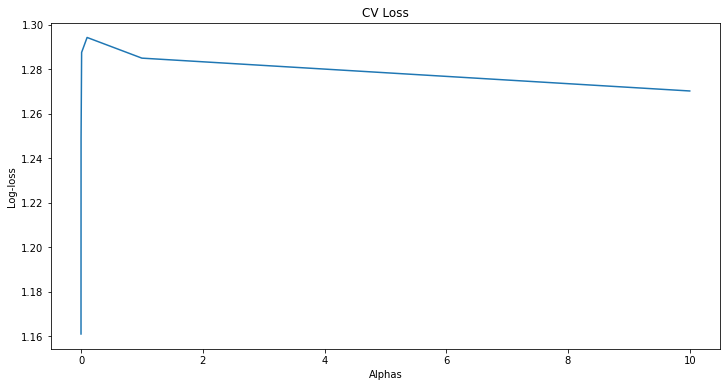

In [486]:
x = list(loss_dict.keys())
y = list(loss_dict.values())
plot(x,y)

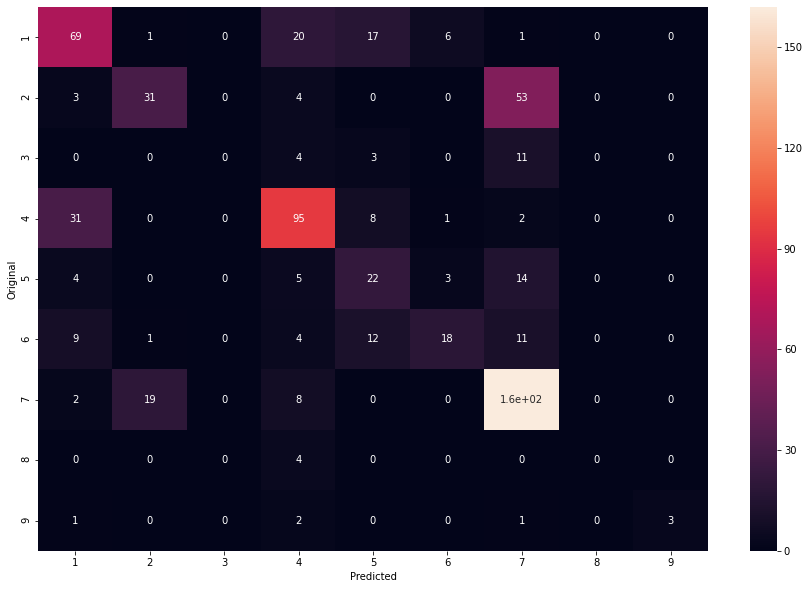

In [487]:
pred = []
for i in predicted_test:
    pred.append(np.argmax(i)+1)
conf_mat(test_class, pred)

In [503]:
import warnings
warnings.filterwarnings('ignore')

## 3. XgBoost

In [492]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

### 3.1. With Tfidf vectors

In [493]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(tfidf_gvt_train, train_class)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\venkatesh lotlikar\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:34:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None...
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None,
                                           scal

In [494]:
print (random_cfl.best_params_)

{'subsample': 1, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.15, 'colsample_bytree': 0.1}


In [504]:
xgb_model=XGBClassifier(n_estimators=100 ,max_depth=10, learning_rate=0.15, colsample_bytree=0.1, subsample=1, nthread=-1)
xgb_model.fit(tfidf_gvt_train, train_class,verbose=True)
calibrated_xgb_model = CalibratedClassifierCV(xgb_model, method="sigmoid")
calibrated_xgb_model.fit(tfidf_gvt_train, train_class)
    
predicted_train = calibrated_xgb_model.predict_proba(tfidf_gvt_train)
train_loss = log_loss(train_class, predicted_train, eps=1e-15)

predicted_cv = calibrated_xgb_model.predict_proba(tfidf_gvt_cv)
cv_loss = log_loss(cv_class, predicted_cv, eps=1e-15)

predicted_test = calibrated_xgb_model.predict_proba(tfidf_gvt_test)
test_loss = log_loss(test_class, predicted_test,  eps=1e-15)

[09:39:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:39:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:39:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:40:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [505]:
print("The train log loss is:",train_loss)
print("The cv log loss is:",cv_loss)
print("The test log loss is:", test_loss)

The train log loss is: 0.49436191779783806
The cv log loss is: 1.77956776371598
The test log loss is: 1.740702672498568


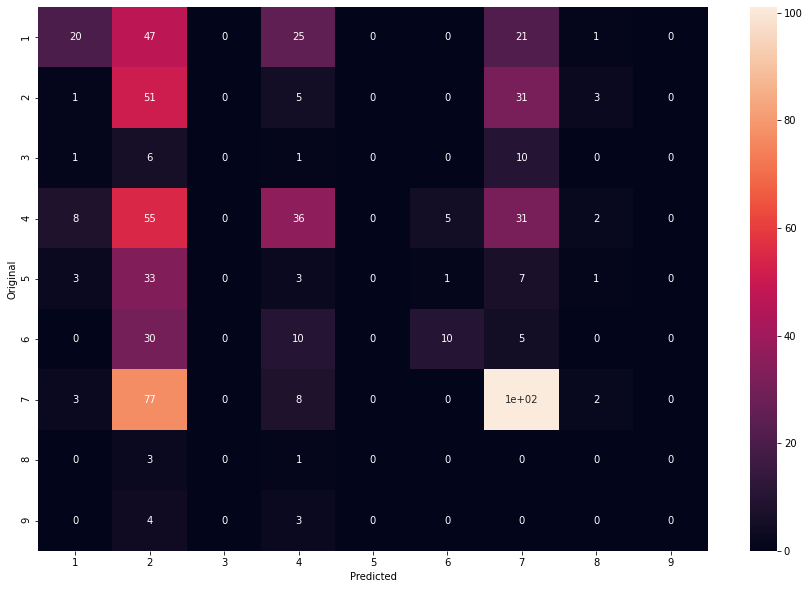

In [508]:
pred = []
for i in predicted_test:
    pred.append(np.argmax(i)+1)
conf_mat(test_class, pred)

### 3.2. With response codes

In [506]:
x_cfl_rc=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl_rc=RandomizedSearchCV(x_cfl_rc,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl_rc.fit(resp_code_gvt_train, train_class)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[09:45:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None...
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None,
                                           scal

In [509]:
print (random_cfl_rc.best_params_)

{'subsample': 1, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 1}


In [510]:
xgb_model=XGBClassifier(n_estimators=200 ,max_depth=3, learning_rate=0.05, colsample_bytree=1, subsample=1, nthread=-1)
xgb_model.fit(resp_code_gvt_train, train_class,verbose=True)
calibrated_xgb_model = CalibratedClassifierCV(xgb_model, method="sigmoid")
calibrated_xgb_model.fit(resp_code_gvt_train, train_class)
    
predicted_train = calibrated_xgb_model.predict_proba(resp_code_gvt_train)
train_loss = log_loss(train_class, predicted_train, eps=1e-15)

predicted_cv = calibrated_xgb_model.predict_proba(resp_code_gvt_cv)
cv_loss = log_loss(cv_class, predicted_cv, eps=1e-15)

predicted_test = calibrated_xgb_model.predict_proba(resp_code_gvt_test)
test_loss = log_loss(test_class, predicted_test,  eps=1e-15)

[09:48:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:48:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:48:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:48:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [511]:
print("The train log loss is:",train_loss)
print("The cv log loss is:",cv_loss)
print("The test log loss is:", test_loss)

The train log loss is: 0.039022226423002564
The cv log loss is: 1.68924399596359
The test log loss is: 1.6933851841437875


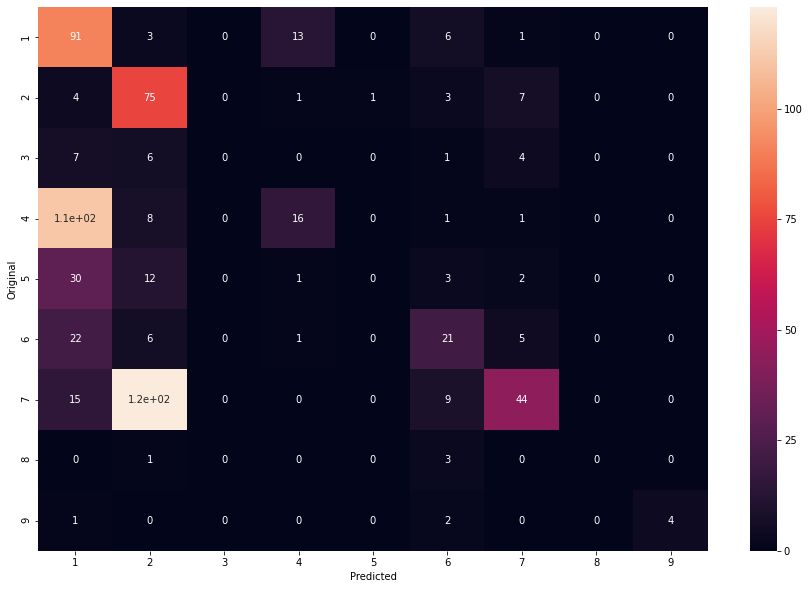

In [512]:
pred = []
for i in predicted_test:
    pred.append(np.argmax(i)+1)
conf_mat(test_class, pred)